In [119]:
import requests
import PyPDF2
import os
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

#Downloading the pdf file
file_url = "https://www.brookings.edu/wp-content/uploads/2020/09/FP_20201001_challenge_of_decarbonizing_heavy_transport.pdf"

# Get the actual filename from the URL
filename = os.path.basename(file_url)

# Find the position of '.pdf' in the filename and keep only the characters before that position
if '.pdf' in filename:
    filename = filename[:filename.index('.pdf') + 4]

#Create the pdf file locally
r = requests.get(file_url, stream = True)

with open(filename,"wb") as pdf:
    for chunk in r.iter_content(chunk_size=1024):
        '''
        writing one chunk as a time to pdf file
        '''
        if chunk:
            pdf.write(chunk)

# Open PDF file
pdffileObj = open(filename, 'rb')

# Create PDF reader object
pdfReader = PyPDF2.PdfReader(pdffileObj)

# Get the total number of pages in the PDF
num_pages = len(pdfReader.pages)
print("Total number of pages:", num_pages)

# Initialize an empty variable to store the extracted text
all_text = ""

# Loop through each page and extract text
for page_num in range(num_pages):
    # Create a page object for the current page
    pageObj = pdfReader.pages[page_num]
    
    # Extract text from the page
    text = pageObj.extract_text()
    
    # Append the extracted text to the 'all_text' variable
    all_text += text

# Print the combined text from all pages
print("Combined Text:", all_text)

# Close the PDF file object
pdffileObj.close()

Total number of pages: 28
Combined Text: 1THE CHALLENGE OF DECARBONIZING HEAVY TRANSPORT
SAMANTHA GROSS
OCTOBER 2020
EXECUTIVE SUMMARY
Many jurisdictions are focused on achieving very low or net-zero greenhouse gas (GHG) emissions by 
mid-century, bringing a spotlight to the biggest challenges in decarbonization. The transportation sector 
is responsible for about one-quarter of global GHG emissions and emissions are growing, even in the 
developed world where other emissions are generally flat. Liquid fuels made from oil dominate the sector; 
they are easy to transport and store, contain a great deal of energy for their weight and volume, and enable 
use of internal combustion engines. The degree of difficulty in decarbonizing transport varies across the 
sector. Electrification is relatively easy for smaller vehicles that travel shorter distances carrying lighter 
loads. For these vehicles, the added weight of a battery is less of a hindrance and the inherently simpler 
and more effi

In [120]:
all_text.splitlines()
sentiment = all_text.split()
print(sentiment)

['1THE', 'CHALLENGE', 'OF', 'DECARBONIZING', 'HEAVY', 'TRANSPORT', 'SAMANTHA', 'GROSS', 'OCTOBER', '2020', 'EXECUTIVE', 'SUMMARY', 'Many', 'jurisdictions', 'are', 'focused', 'on', 'achieving', 'very', 'low', 'or', 'net-zero', 'greenhouse', 'gas', '(GHG)', 'emissions', 'by', 'mid-century,', 'bringing', 'a', 'spotlight', 'to', 'the', 'biggest', 'challenges', 'in', 'decarbonization.', 'The', 'transportation', 'sector', 'is', 'responsible', 'for', 'about', 'one-quarter', 'of', 'global', 'GHG', 'emissions', 'and', 'emissions', 'are', 'growing,', 'even', 'in', 'the', 'developed', 'world', 'where', 'other', 'emissions', 'are', 'generally', 'flat.', 'Liquid', 'fuels', 'made', 'from', 'oil', 'dominate', 'the', 'sector;', 'they', 'are', 'easy', 'to', 'transport', 'and', 'store,', 'contain', 'a', 'great', 'deal', 'of', 'energy', 'for', 'their', 'weight', 'and', 'volume,', 'and', 'enable', 'use', 'of', 'internal', 'combustion', 'engines.', 'The', 'degree', 'of', 'difficulty', 'in', 'decarbonizing'

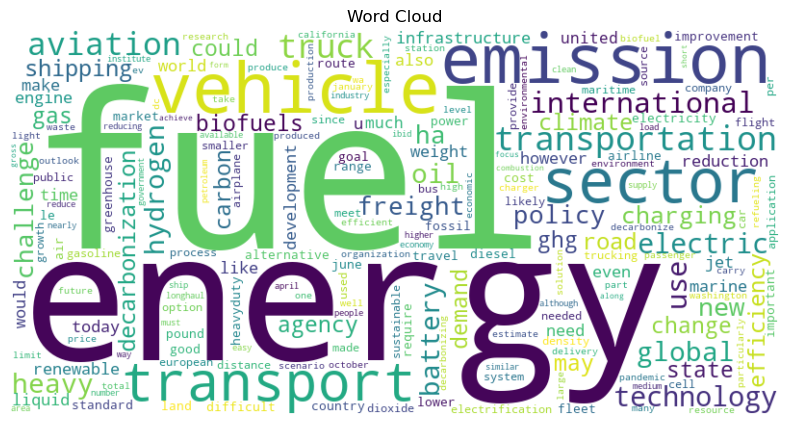

In [121]:
import nltk

#nltk.download('omw-1.4')

import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Sample list of words
word_list = sentiment

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Create a translation table to remove punctuation
translator = str.maketrans('', '', string.punctuation)

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Count the occurrence of each relevant word (ignoring capitalization, punctuation, and numbers)
word_counts = {}
for word in word_list:
    # Convert the word to lowercase for case-insensitive comparison
    word = word.lower()

    # Remove punctuation from the word
    word = word.translate(translator)

    # Lemmatize the word to get its base form (singular)
    word = lemmatizer.lemmatize(word)

    # Check if the lowercase word is in the stop words set and if it contains only alphabetic characters
    if word not in stop_words and word.isalpha():
        word_counts[word] = word_counts.get(word, 0) + 1

# Prepare data for plotting
words = list(word_counts.keys())
counts = list(word_counts.values())

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

# Prepare data for word cloud
wordcloud_data = dict(zip(words, counts))

# Create word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()
